In [39]:
import json
import matplotlib.pyplot as plt
import numpy as np


def running_avg(list1, list2, i):
    return [(x * i + y) / (i + 1) for x,y in zip(list1, list2)]

def plot_water_map(actions, m, n, plants):
    heatmap = np.sum(actions, axis=0)
    heatmap = heatmap.reshape((m, n))
    plt.imshow(heatmap, cmap='Blues', interpolation='nearest')
    for plant in plants:
        plt.plot(plant[0], plant[1], marker='X', markersize=15, color="lawngreen")
    plt.show()
    
def plot_final_garden(garden, x, y, step):
    X = 10
    Y = 10
    step = 1
    fig, ax = plt.subplots()
    plt.xlim((0, x * step))
    plt.ylim((0, y * step))
    ax.set_aspect('equal')

    major_ticks = np.arange(0, x * step + 1, x // 5)
    minor_ticks = np.arange(0, x * step + 1, step)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    rows = garden.shape[0]
    cols = garden.shape[1]
    for x in range(0, rows):
        for y in range(0, cols):
            if garden[x,y] != 0:
                circle = plt.Circle((x,y) * step, garden[x,y], color="green")
                plt.plot(x, y, marker='X', markersize=15, color="lawngreen")
                ax.add_artist(circle)

    plt.show()
    
def plot_average_reward(reward, days, y_range):
    fig = plt.figure(figsize=(28, 10))
    plt.xticks(np.arange(0, days, 5))
    plt.yticks(np.arange(0.0, y_range, 1))
    plt.title('Average Reward Over ' + str(days) + ' Days', fontsize=18)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Reward', fontsize=16)

    plt.plot([i for i in range(days)], reward, linestyle='--', marker='o', color='g')
    # plt.savefig('avg_r.png')
    plt.show()
    
def plot_stddev_reward(reward, reward_stddev, days, y_range):
    fig = plt.figure(figsize=(28, 10))
    plt.xticks(np.arange(0, days, 10))
    plt.yticks(np.arange(0, y_range, 1))
    plt.title('Std Dev of Reward Over ' + str(days) + ' Days', fontsize=18)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Reward', fontsize=16)

    plt.errorbar([i for i in range(40)], reward, reward_stddev, linestyle='None', marker='o', color='g')
    # plt.savefig('std_id.png')
    plt.show()

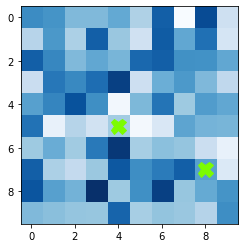

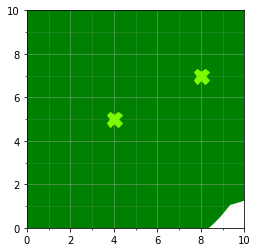

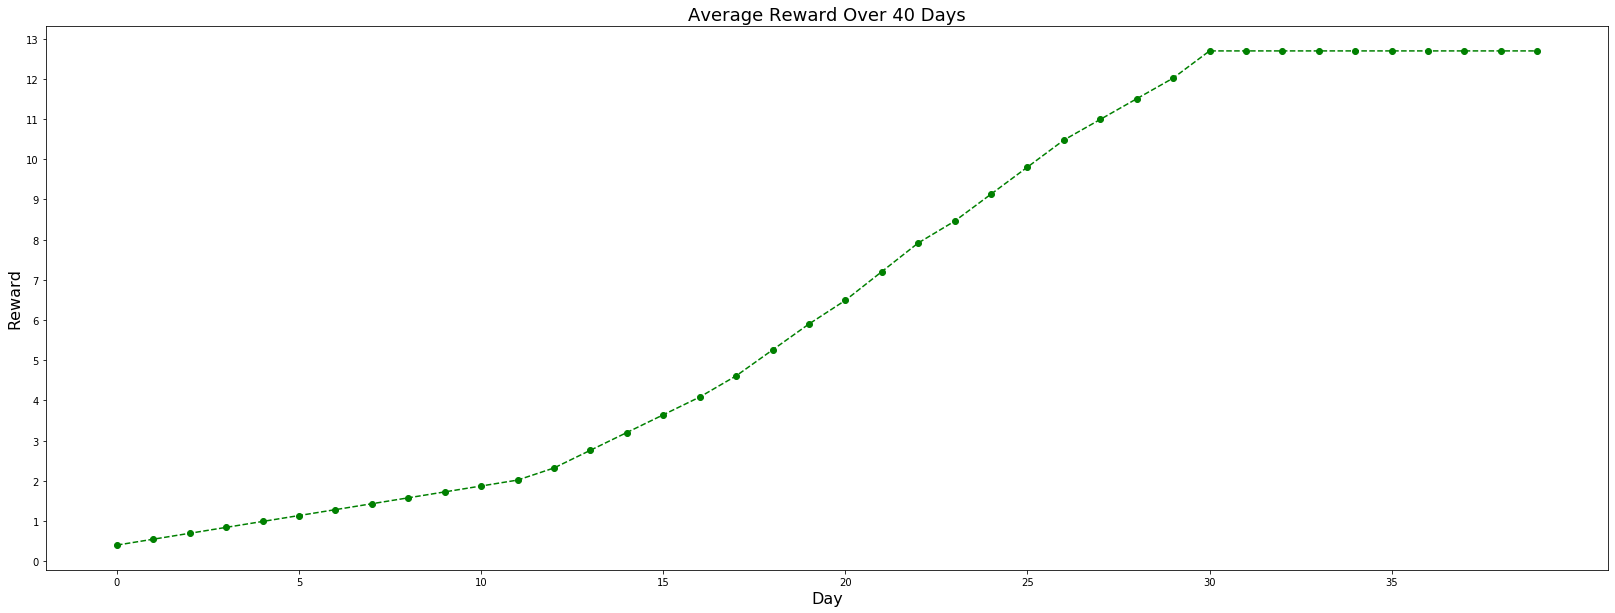

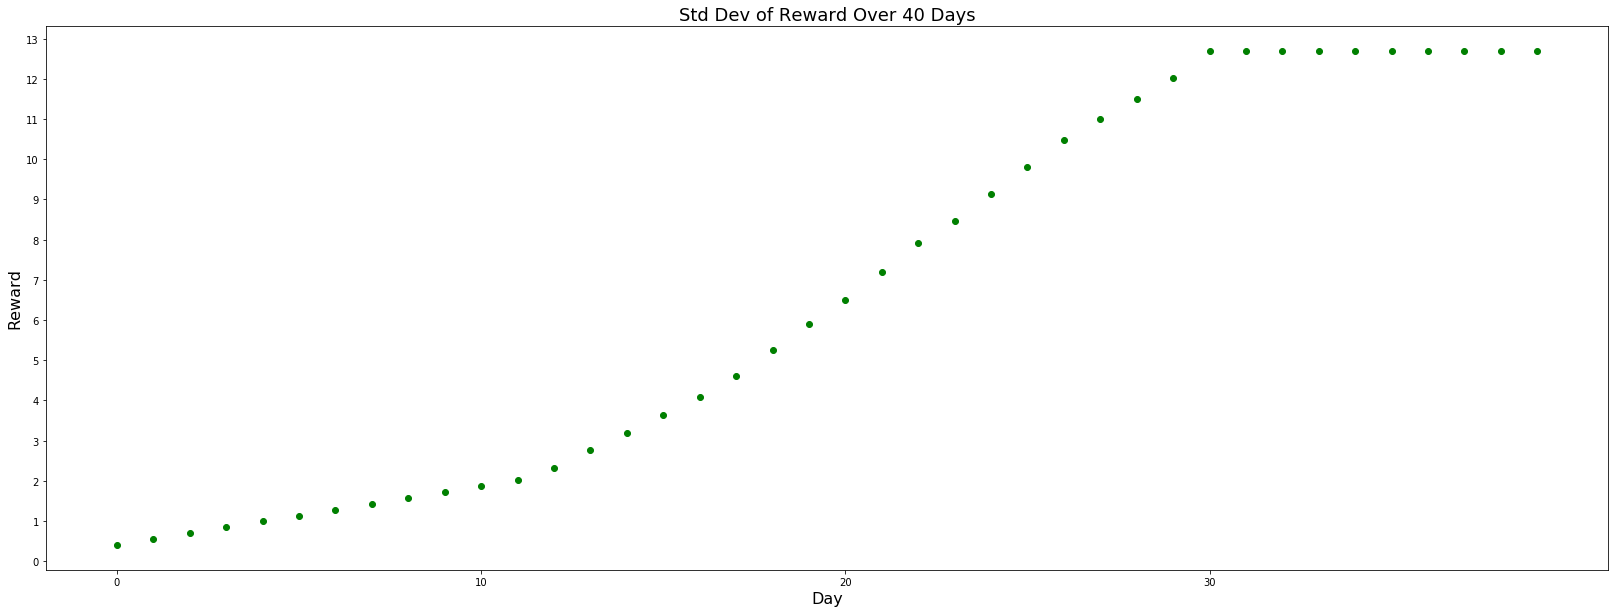

In [40]:
obs = [0] * 182
r = [0] * 182
for i in range(50):
    with open('PPO_Returns/predict_' + str(i) + '.json') as f_in:
        data = json.load(f_in)
        obs = data['obs']
        rewards = data['rewards']
        r = running_avg(r, rewards, i)
        action = data['action']

rewards_stddev = [np.std(val) for val in r]

final_obs = obs[38]
dimensions = len(final_obs)
garden = np.array([[0.0 for i in range(dimensions)] for j in range(dimensions)])
for i in range(dimensions):
    s = np.array([0.0 for i in range(dimensions)])
    for j in range(2):
        s = np.add(s, np.array(final_obs[i]).T[j])
    garden[i] = s
    
plot_water_map(action,10, 10, [(4, 5), (8, 7)])
plot_final_garden(garden, 10, 10, 1)
plot_average_reward(r, 40, 20)
# rewards_stddev
plot_stddev_reward(rewards, rewards_stddev, 40, 20)